🧠 ¿Qué es Naive Bayes?
Es un clasificador basado en el Teorema de Bayes, con una gran suposición:

Todas las variables (características) son independientes entre sí.

🔹 Esa suposición de "independencia ingenua" es lo que le da el nombre:
Naive (ingenuo) + Bayes (por el teorema de Bayes).

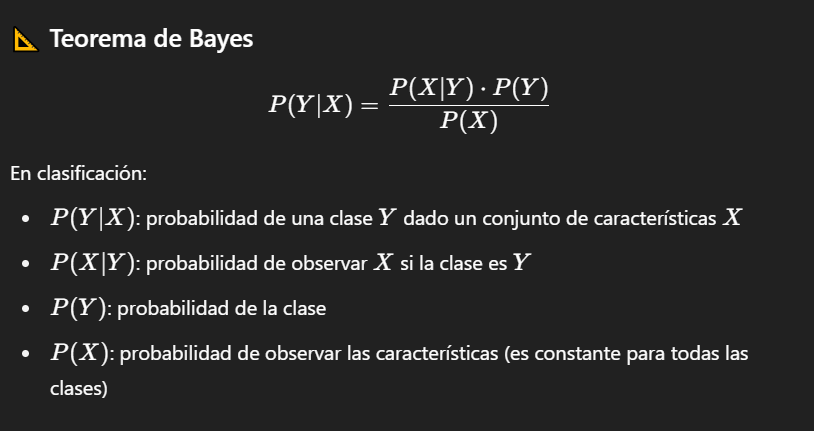

🚀 ¿Cómo clasifica?
Calcula la probabilidad de cada clase usando los datos.

Calcula la probabilidad de que un ejemplo pertenezca a cada clase.

Elige la clase con la mayor probabilidad.

🔧 Tipos de Naive Bayes en sklearn

- GaussianNB → para variables continuas (como altura, peso).
- MultinomialNB → para conteo de palabras (texto).
- BernoulliNB → para variables binarias (presencia o ausencia).

✅ Ventajas

- Muy rápido.
- Requiere pocos datos de entrenamiento.
- Funciona bien con grandes cantidades de texto.

⚠️ Desventajas

- La suposición de independencia total entre variables rara vez es realista.
- Puede fallar si las características están muy correlacionadas.



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB


In [17]:
df = pd.read_csv(r"C:\Users\steve\OneDrive\Documentos\python\base_datos_2008.csv")
df = df.sample(frac=1)
df = df.head(50000)

In [18]:
df = df.dropna(subset=["ArrDelay"])

In [19]:
Y = df["ArrDelay"] > 0 #Retraso en la llegada mayor  un minuto
Y

2581624    False
1241595    False
2241071    False
4897286     True
1133560    False
           ...  
6607568    False
4463988    False
1206796    False
6097676    False
772376      True
Name: ArrDelay, Length: 48900, dtype: bool

In [20]:
df["Month"] = df["Month"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["TailNum"] = df["TailNum"].apply(str)

X = pd.get_dummies(data=df[["Month", "DayOfWeek","TailNum","Origin","Dest", "UniqueCarrier"]])
X.columns

Index(['Month_1', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7',
       ...
       'UniqueCarrier_HA', 'UniqueCarrier_MQ', 'UniqueCarrier_NW',
       'UniqueCarrier_OH', 'UniqueCarrier_OO', 'UniqueCarrier_UA',
       'UniqueCarrier_US', 'UniqueCarrier_WN', 'UniqueCarrier_XE',
       'UniqueCarrier_YV'],
      dtype='object', length=5686)

In [21]:
X.head()

,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
2581624,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1241595,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2241071,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4897286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1133560,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
clf = BernoulliNB()
#clf = MultinomialNB()
clf.fit(X,Y)
Y_pred  = clf.predict(X)

In [23]:
np.mean(Y == Y_pred)

np.float64(0.652760736196319)

In [24]:
1-np.mean(Y)

np.float64(0.5642740286298569)

In [26]:
X = df[["AirTime", "Distance", "TaxiIn", "TaxiOut"]] #DepDelay
clf = GaussianNB()
clf.fit(X,Y)
Y_pred = clf.predict(X)

In [27]:
np.mean(Y == Y_pred)

np.float64(0.6537014314928425)

# Prueba del modelo
✅ ¿Para qué te sirve tener un modelo entrenado?
1. Hacer predicciones sobre nuevos datos
Puedes usar tu modelo para predecir retrasos en vuelos futuros (u otro evento), si tienes los datos de entrada.

In [29]:
nuevo_vuelo = pd.DataFrame({
    "AirTime": [120],
    "Distance": [800],
    "TaxiIn": [5],
    "TaxiOut": [15]
})


prediccion = clf.predict(nuevo_vuelo)
print("¿Tendrá retraso?", prediccion[0])

¿Tendrá retraso? False


# Resumen

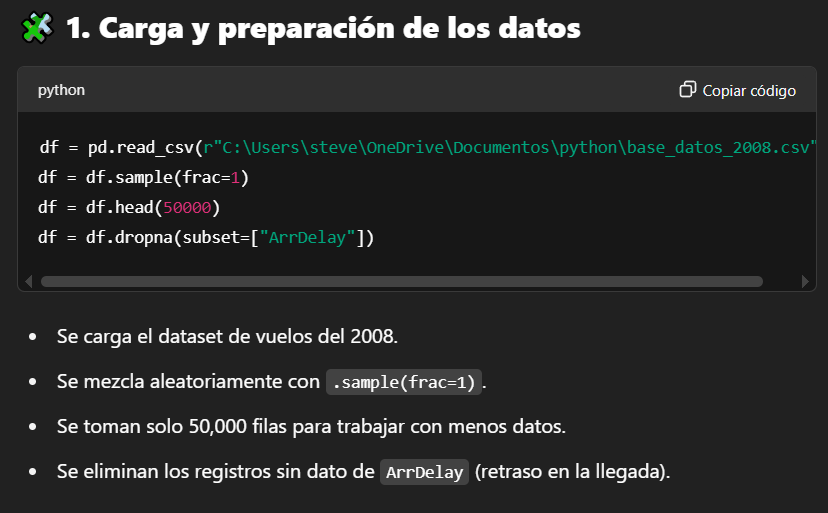
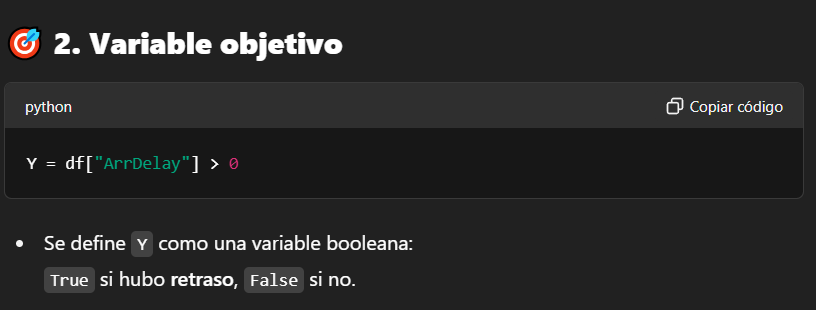
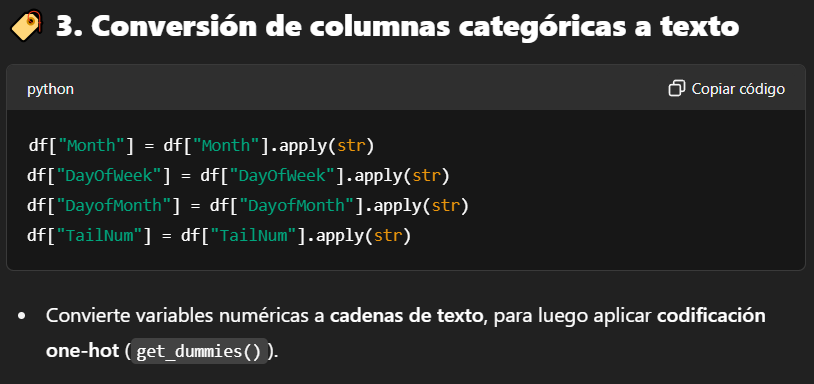
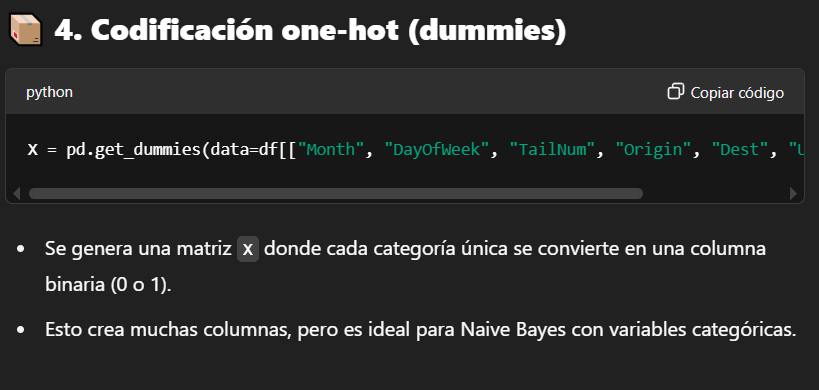
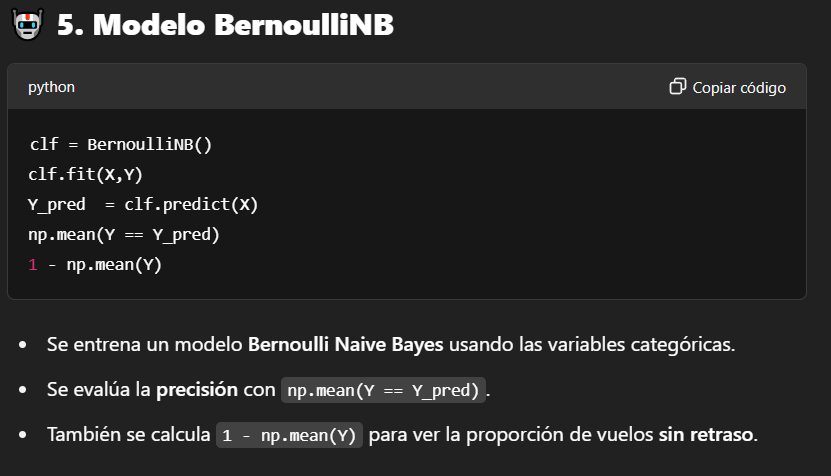
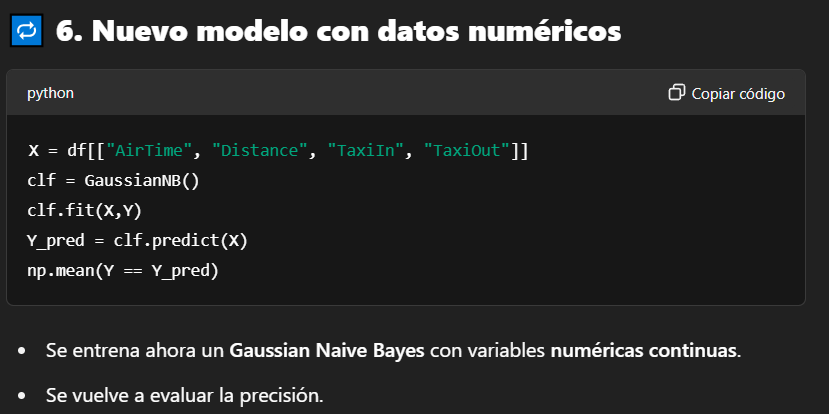
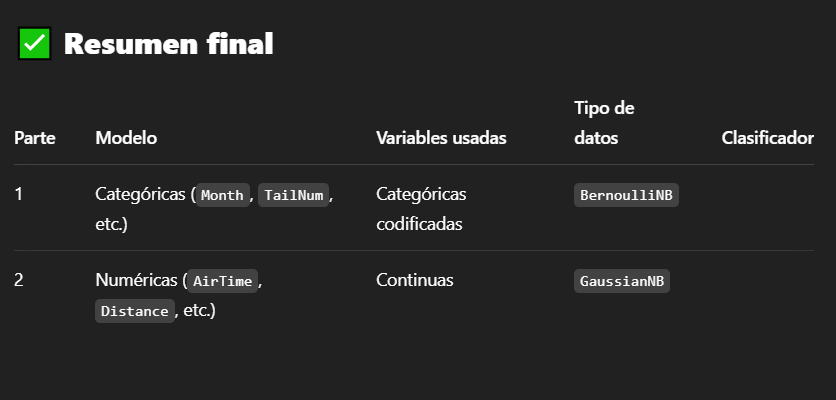
